# Task 6: Decision Tree Classifier

### Author: Alaa Nabil Ali

##### A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.<br><br>The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

### Importing Libraries

In [105]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the Data

In [106]:
# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
#Dataset details
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [108]:
#Dataset Description
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Preprocessing

In [109]:
random_state = 10

#Seperating features columns from target column.
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

#Performing label encoding for target column.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training(80%) and testing(20%) sets  
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=random_state)

# Print the shape of train and test datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


***> we can see that the train dataset contains 120 rows while the test dataset contains 30 rows.***

### Implementation of Decision Tree Classifier

In [110]:
# Create a decision tree classifier model
dtc = DecisionTreeClassifier(random_state=random_state)

# Fit the decision tree classifier to the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

### Evaluation of the model

In [111]:
# Print the accuracy score of the decision tree classifier
print("Training accuracy:",accuracy_score(y_train, dtc.predict(X_train)))
print("Test accuracy:",accuracy_score(y_test, y_pred))

Training accuracy: 1.0
Test accuracy: 0.9666666666666667


***> we can achieve a high accuracy score of around 97% on the Iris dataset. This indicates that the decision tree classifier is able to capture the patterns in the data and make accurate predictions.***

In [112]:
# Calculate the confusion matrix for the decision tree classifier
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]



***> The confusion matrix shows that the model made some errors in predicting the species of iris flowers. <br>
For example, it incorrectly predicted one Versicolor flower as a Virginica flower. <br> > However, overall the model performed well, with most of the predictions being correct.***

### Visualization of the feature importance's

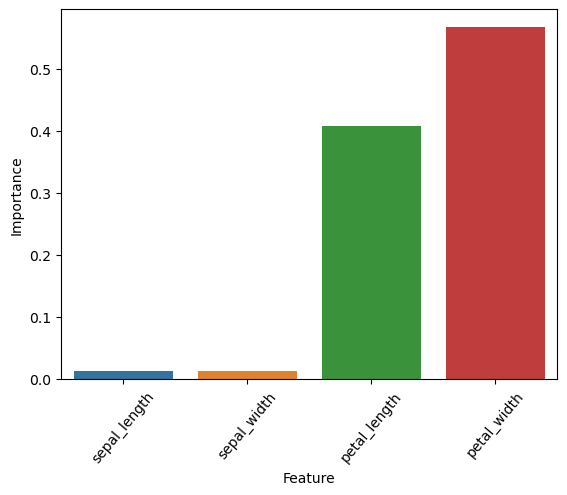

In [113]:
# Visualize the feature importance's for the input features
sns.barplot(X.columns, dtc.feature_importances_)
plt.xticks(rotation = 50)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

***> From the bar plot above, we can see that the importance of ‘petal width’ is highest amongst the feature inputs. This means that ‘petal width’ has the largest effect on our decision tree classifier model that was used for classification.***

### Visualization of the Decision Tree Classifer

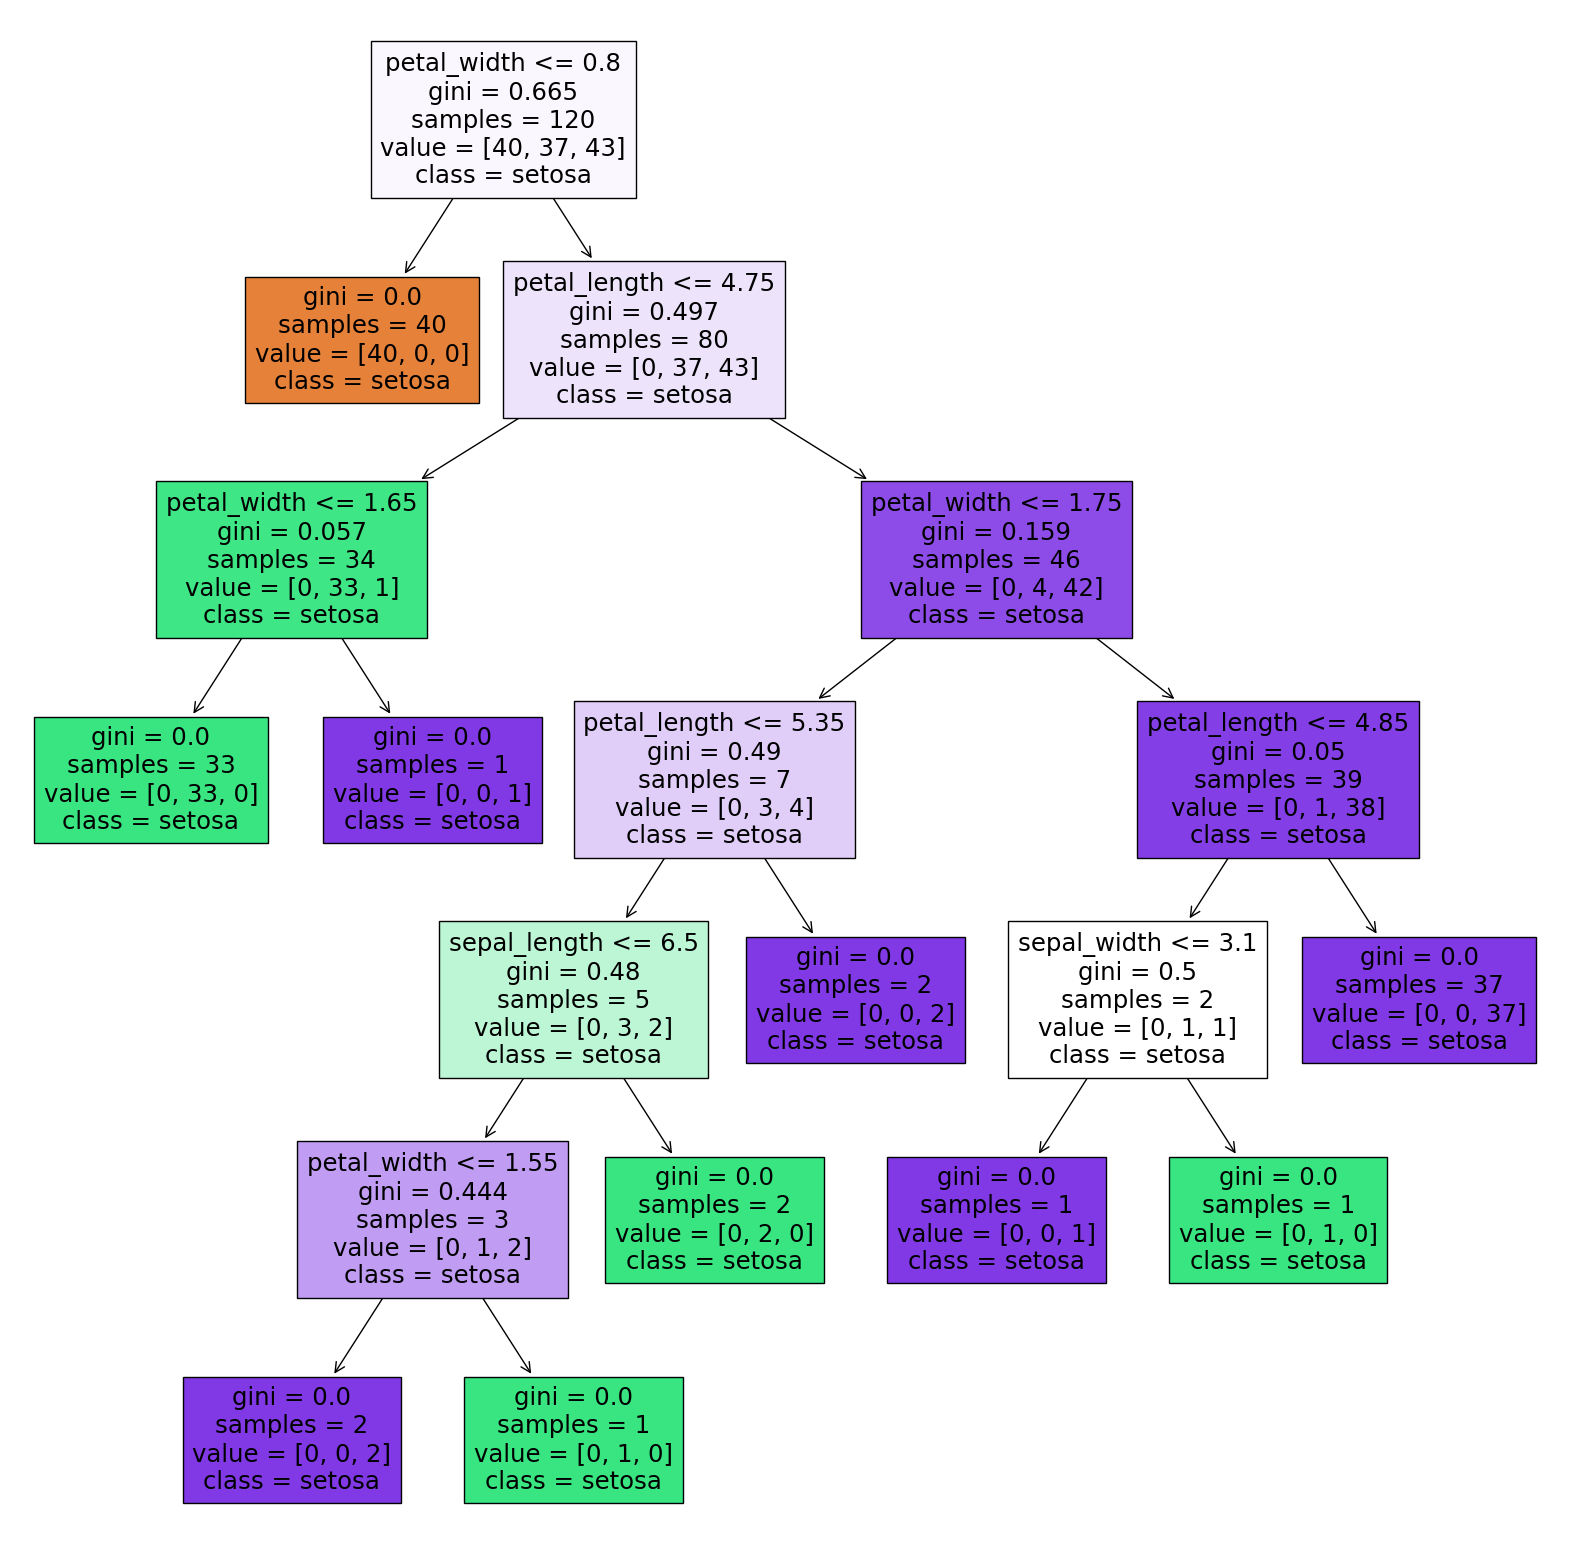

In [114]:
# Plot the decision tree
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=X.columns, class_names=y, filled=True)
plt.show()

***> Petal length and width are the most important features: When constructing the decision tree, we can see that the first split is based on petal width, indicating that this is the most important feature for predicting the species of iris flowers.<br> > Petal length is also an important feature, but not as much as petal width. <br> > Sepal length and width are also important features but are not used until later in the tree.***

### Exporting the Decision Rules

In [115]:
# Export the decision rules
tree_rules = export_text(dtc, feature_names = list(X.columns))

# Print the result
print(tree_rules)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal_width >  1.65
|   |   |   |--- class: 2
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 5.35
|   |   |   |   |--- sepal_length <= 6.50
|   |   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal_length >  6.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal_length >  5.35
|   |   |   |   |--- class: 2
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal_width >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal_length >  4.85
|   |   |   |   |--- class: 2



*hint: class 0 is (Setosa flower), class 1 is (Versicolor flower), and class 2 is (Virginica flower).<br>*
***> we can see the different decision rules used by the decision tree classifier to predict the species of iris flowers based on their petal and sepal measurements. <br> > For example, the first rule is based on the petal width, and if it is less than or equal to 0.80, the predicted class is 0 (Setosa).<br> > If the petal width is greater than 0.80, the classifier continues down the tree to the next set of rules until it reaches a leaf node, which corresponds to the predicted class.***